In [1]:
import warnings
warnings.filterwarnings("ignore")
import boolean2 as b2
import matplotlib as mpl
import matplotlib.pyplot as plt
import string_model_builder_3 as builder
from numpy.ma import masked_equal
import numpy as np
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable


In [2]:
# model helper functions
# initialise any loose nodes
def missing( node_name ):
    return True

def run_model(definition, runs=1, steps=15, mode='sync'): # returns model or array of models of length runs
    
    models = []
    for i in range(runs):
        # run model under settings
        model = b2.Model(text=definition, mode=mode)
        model.initialize( missing=missing ) # initialise any loose nodes to true
        model.iterate(steps=steps)
        models.append(model)
    return model if runs==1 else models
    
    
def print_model(model): # print node states
    for node in model.data:
        print node, model.data[node]

In [17]:
definition = builder.string2definition('string_model_3_definition.txt') 
definition = builder.add_mtb2definition(definition, mtb_edgelist='mtb-edgelist.csv', initial_value=True)
models = run_model(definition, runs=100, steps=100)
models


added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


In [32]:
def get_cycles(models):
    # (start index, size) 
    # size = 0 => no cycle/steady state
    # size = 1 => steady state
    return [ model.detect_cycles() for model in models]

def count_cycles(cycles):
    # (# none, # steady, # other)
    none = 0
    steady = 0
    other = 0 
    for cycle in cycles:
        if cycle[1] == 0: none+=1
        elif cycle[1] == 1: steady+=1
        else: other+=1
    return ('none: '+str(none), 'steady: '+str(steady), 'other: '+str(other))

def print_cycles(cycles):
    print "index", '\t', 'size'
    for cycle in cycles: 
        print cycle[0], '\t', cycle[1]   

def average_cycles(cycles):
    return np.average(cycles, 0)

In [35]:
cycles = get_cycles(models)
print count_cycles(cycles) 
print_cycles(cycles)

(57, 41, 2)
index 	size
78 	1
19 	1
0 	0
0 	0
58 	1
0 	0
22 	1
0 	0
0 	0
37 	1
88 	1
0 	0
37 	1
55 	1
0 	0
0 	0
0 	0
54 	1
0 	0
0 	0
63 	1
0 	0
0 	0
23 	1
0 	0
26 	1
24 	2
58 	1
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
32 	1
85 	1
0 	0
0 	0
54 	1
0 	0
0 	0
94 	1
0 	0
0 	0
0 	0
11 	1
0 	0
0 	0
55 	1
0 	0
0 	0
0 	0
18 	1
0 	0
0 	0
0 	0
77 	1
0 	0
30 	1
29 	1
0 	0
20 	1
16 	1
0 	0
20 	1
0 	0
0 	0
72 	1
13 	1
0 	0
77 	1
0 	0
0 	0
78 	1
8 	2
0 	0
10 	1
99 	1
0 	0
8 	1
7 	1
12 	1
0 	0
0 	0
63 	1
0 	0
0 	0
51 	1
0 	0
0 	0
0 	0
0 	0
57 	1
0 	0
95 	1
0 	0
6 	1
0 	0
34 	1
0 	0


In [192]:
definition = builder.string2definition('string_model_3_definition.txt') 
definition = builder.add_mtb2definition(definition, mtb_edgelist='mtb-edgelist.csv', initial_value=True)
models = run_model(definition, runs=1, steps=100)
models


added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


In [58]:
def models2datas(models): # this is so we can plot model data and average data with the same functions
    return [model.data for model in models]

def plot_datas(datas, nodes=None, w=10, h=32, fontsize=12, title = 'Node Heatmap'): # plot multiple model.data (node states)
    plt.rcParams.update({'font.size': fontsize})

    # set figure with #models  
    print len(datas)
    fig, axes = plt.subplots(len(datas),1)
    #, figsize=(w,h))
    
    # select plot data
    plots = []
    for data in datas:
        plot = []
        labels = sorted(data.keys()) if not nodes else nodes # sort alphabetically, or a list of ordered nodes
        for label in labels:
            bindata = np.array(data[label]).astype(float) # convert bool to bin if necessary
            plot.append(bindata)
        plots.append(plot)
        
    # plot datas on axes:
    cmap=plt.cm.get_cmap('gray') # off (0) = black, on (1) = white
    for ax, plot in zip(axes, plots):
        im = ax.imshow(plot, cmap=cmap)
        ax.set_yticks(np.arange(len(labels)))
        ax.set_yticklabels(labels)
        ax.set_aspect('auto')
        ax.set_title(title)
        ax.set_xlabel('Steps')
    
    divider = make_axes_locatable(ax) # adding color bar here ...
    cax = divider.append_axes('right', size='2%', pad='1%')
    fig.colorbar(im, orientation = 'vertical', cax= cax)

2


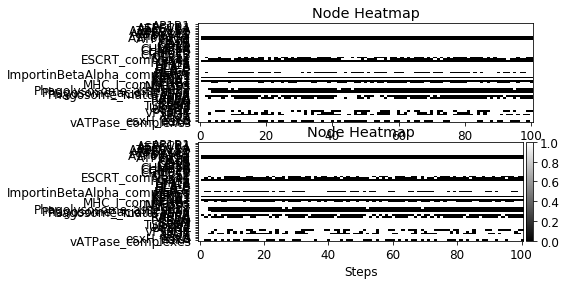

In [60]:
plot_datas([models[0].data, models[1].data], h = 64)

In [189]:
definition = builder.string2definition('string_model_3_definition.txt') 
definition = builder.add_mtb2definition(definition, mtb_edgelist='mtb-edgelist.csv', initial_value=True)
model = run_model(definition, runs=1, steps=100)
model

added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


In [272]:

def plot_data(data, ax,
              nodes=None,
              title = None
             ): # plots model.data (node states) onto axis

    # select plot data
    plot = []
    labels = sorted(data.keys()) if not nodes else nodes # sort alphabetically, or a list of ordered nodes
    for label in labels:
        bindata = np.array(data[label]).astype(float) # convert bool to bin if necessary
        plot.append(bindata)
        
    # plot data
    cmap=mpl.cm.gray # off (0) = black, on (1) = white
    norm = mpl.colors.Normalize(vmin=0, vmax=1) # make sure 0 is always mapped to white, 1 to black
    im = ax.imshow(plot, cmap=cmap, norm=norm)
    ax.set_yticks(np.arange(len(labels)))
    ax.set_yticklabels(labels)
    ax.set_aspect('auto')
    if title: ax.set_title(title)
    ax.set_xlabel('steps')
    return im # return handle to the axes for stupid colour bar
    


In [1]:
datas = [model.data, model.data]
# titles = [1,2]
# nodes = ['B2M']
nodes = [] 
titles = []
h = 18
w = 20
left = 0.2  # the left side of the subplots of the figure
right = 0.9   # the right side of the subplots of the figure
bottom = 0.1  # the bottom of the subplots of the figure
top = 0.95     # the top of the subplots of the figure
wspace = 0.2  # the amount of width reserved for space between subplots,
hspace = 0.2  # the amount of height reserved for space between subplots
 
fontsize = 16
suptitlesize = 24
suptitle = 'Title'
filename = 'map'
dpi = 200

def plot_maps(datas, # array of model.data 
              titles = [], # map titles in same order
              nodes = [],  # nodes plotted across all maps
              filename='map.png', 
              suptitle='  Average Node State Heatmap', 
              fontsize=16,
              suptitlesize = 24,
              h = 18, # inches
              w = 20, # inches
              left = 0.2,  # the left side of the subplots of the figure
              right = 0.9,   # the right side of the subplots of the figure
              bottom = 0.1,  # the bottom of the subplots of the figure
              top = 0.95,     # the top of the subplots of the figure
              wspace = 0.2,  # the amount of width reserved for space between subplots
              hspace = 0.2,  # the amount of height reserved for space between subplots
              dpi = 200
             ): # sets up axes into subplot
    plt.rcParams.update({'font.size': fontsize})
    
    # setup plot
    fig, axes = plt.subplots(len(datas),1, figsize=(w,len(datas)*h))#, figsize=(10,2))
    axes = axes if not len(datas)==1 else [axes]    # plot axes
   
    if not titles: titles = range(1, len(datas)+1)
    for data, ax, title in zip(datas, axes , titles ):
        if not nodes: nodes = sorted(data.keys())
        im = plot_data(data, ax, nodes = nodes, title=title)   
        # add colour bar
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='2%', pad='1%')
        fig.colorbar(im, orientation = 'vertical', cax= cax)
        
    # adjust
    plt.subplots_adjust(hspace=hspace, top=top, left=left, right=right, wspace=wspace, bottom=bottom)
    fig.suptitle(suptitle, fontsize = suptitlesize)
    
    # show savedown
    plt.show()
    fig.savefig(filename, dpi=dpi)





NameError: name 'model' is not defined

In [2]:
plot_maps([model.data, model.data])

NameError: name 'plot_maps' is not defined

In [ ]:
ax = plot_data(model.data, axes[0], nodes = ['AP1B1'], fontsize=12)


In [168]:
models = run_model(definition,runs=1, steps=1000)
models.detect_cycles()
models.report_cycles()

Steady state starting at index 104 -> State: AP1B1=True, ASPSCR1=True, ATP6V1A=True, ATP6V1B2=True, ATP6V1D=True, ATP6V1E1=True, ATP6V1F=True, ATP6V1G1=True, ATP6V1H=False, B2M=False, CALR=True, CD1B=True, CD1D=True, CD8A=True, CHMP2A=True, CHMP2B=True, CHMP3=True, CHMP4B=True, CLVS2=True, DERL1=True, ESCRT_complexes=False, GGA1=False, HGS=False, HIP1R=True, HLA-A=True, HLA-B=True, HLA-C=True, HLA-E=True, HLA-G=True, ImportinBetaAlpha_complexes=False, KLRC1=True, KLRD1=True, KPNA1=False, KPNA2=True, KPNB1=False, MHC_I_complexes=False, NSFL1C=True, NUTF2=True, PPE2=True, Phagolysosome_assembly=False, Phagosome_acidification=False, Phagosome_maturation=False, PtpA=True, RAB5A=False, RAB7A=False, RAN=True, STAM=True, SapM=True, TSG101=True, UBXN7=True, UFD1L=True, VCP=True, VPS33B=False, XPO1=False, XPO5=False, esxA=True, esxH_esxG=True, ndkA=True, vATPase_complexes=True


In [29]:
class DummyModel: # dummy model with data attribute
    def __init__(self, data):
        self.data = data

In [132]:
model = ([])
model.data

[]

In [139]:
def average_models(models, nodes = None, w=10, h=32):
    # collect models into average (from booleannet docs)
    coll = b2.util.Collector()
    for model in models:
        coll.collect(states = model.states, nodes=model.nodes)
    avgs = coll.get_averages()   
    
    return avgs

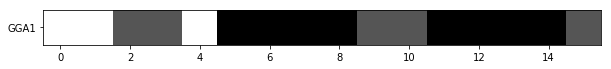

In [138]:
plot_average(models, nodes = ['GGA1'])

In [13]:
# comment relevent lines
new_definition = definition.split('\n')
for i, line in enumerate(new_definition):
    if line.startswith('VCP'):
#         print '#'+line # comment initialisation and rule
        new_definition[i] = '#'+line
        continue
new_definition.insert(1, 'VCP' + ' = False #knockout') # make off
print '\n'.join(new_definition)

#initial conditions
VCP = False #knockout
AP1B1 = True
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
#VCP = True
VPS33B = True
XPO1 = True
XPO5 = True

#rules
NUTF2 *= KPNA2 or KPNB1 or RAN
ATP6V1D *= ATP6V1G1 or ATP6V1B2 or ATP6V1E1 or ATP6V1H or ATP6V1F or ATP6V1A
CD1D *= CD1B or B2M
ATP6V1F *= ATP6V1D or ATP6V1E1 or ATP6V1A or ATP6V1B2 or UBXN7 or ATP6V1H or ATP6V1G1
ATP6V1A *= ATP6V1D or ATP6V1E1 or ATP6V1G1 or ATP6V1F or ATP6V1H or ATP6V1B2
KLRD1 *= HLA-E or HLA-A or B2M or KLRC1
HLA-C *= CA

In [16]:
def knockout(definition, knockouts=[]):
    assert isinstance(knockouts, list), "takes list"
    new_definition = definition.split('\n')
    for knockout in knockouts:
        for i, line in enumerate(new_definition):
            if line.startswith(knockout):
                new_definition[i] = '#'+line # comment initialisation and rule
                continue
        new_definition.insert(1,knockout + ' = False #knockout') # make off
    return '\n'.join(new_definition)
        
        
        

#initial conditions
STAM = False #knockout
VCP = False #knockout
AP1B1 = True
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
#STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
#VCP = True
VPS33B = True
XPO1 = True
XPO5 = True

#rules
NUTF2 *= KPNA2 or KPNB1 or RAN
ATP6V1D *= ATP6V1G1 or ATP6V1B2 or ATP6V1E1 or ATP6V1H or ATP6V1F or ATP6V1A
CD1D *= CD1B or B2M
ATP6V1F *= ATP6V1D or ATP6V1E1 or ATP6V1A or ATP6V1B2 or UBXN7 or ATP6V1H or ATP6V1G1
ATP6V1A *= ATP6V1D or ATP6V1E1 or ATP6V1G1 or ATP6V1F or ATP6V1H or ATP6V1B2
KLRD1 *= HLA-E or HLA-A or 

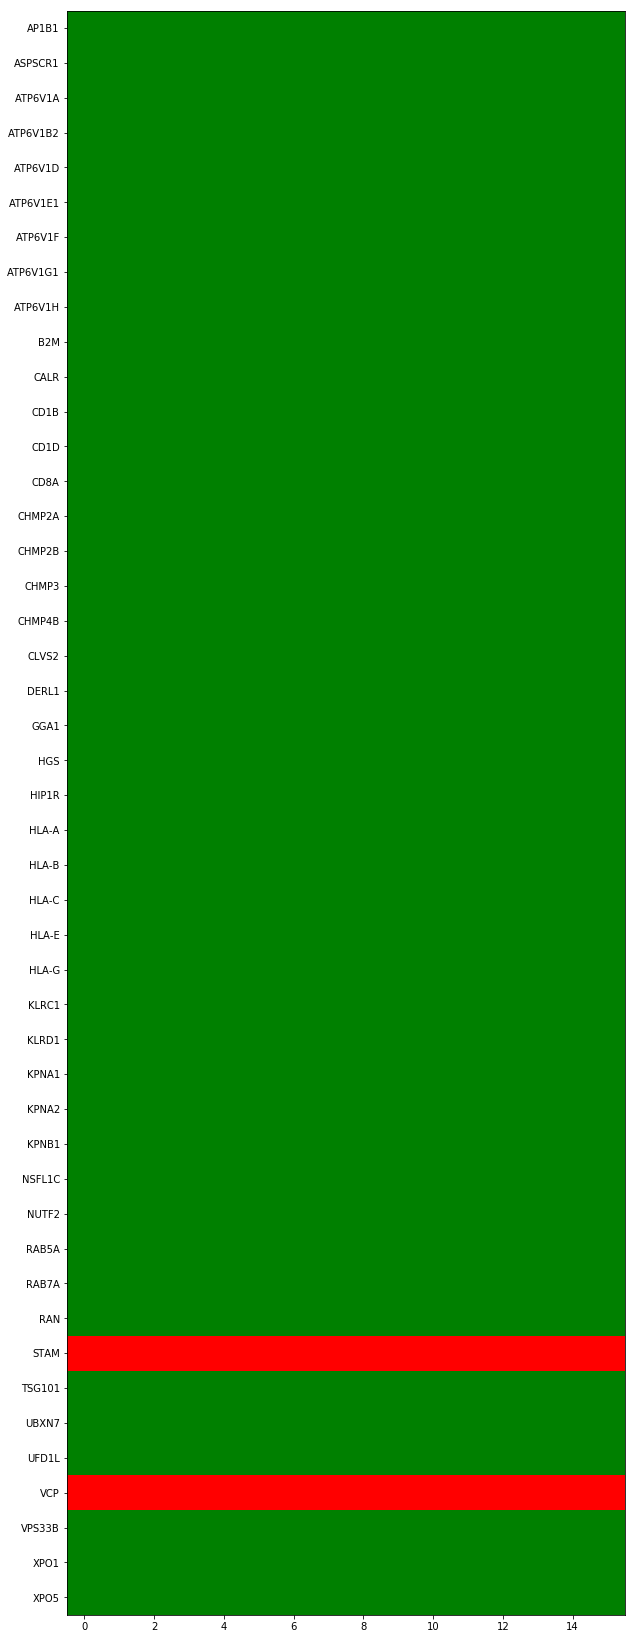

In [17]:
new_definition = knockout(definition, ['VCP', 'STAM'])
print new_definition
new_model = run_model(new_definition)
plot_model(new_model)

In [238]:
# comment relevent lines
for line in definition.split('\n'):
    if line.startswith('AP1B1' + ' ='):
        print 'AP1B1 = False' # comment initialisation and rule
        continue
    print line


#initial conditions
AP1B1 = False
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
VCP = True
VPS33B = True
XPO1 = True
XPO5 = True

#rules
NUTF2 *= KPNA2 and KPNB1 and RAN
ATP6V1D *= ATP6V1G1 and ATP6V1B2 and ATP6V1E1 and ATP6V1H and ATP6V1F and ATP6V1A
CD1D *= CD1B and B2M
ATP6V1F *= ATP6V1D and ATP6V1E1 and ATP6V1A and ATP6V1B2 and UBXN7 and ATP6V1H and ATP6V1G1
ATP6V1A *= ATP6V1D and ATP6V1E1 and ATP6V1G1 and ATP6V1F and ATP6V1H and ATP6V1B2
KLRD1 *= HLA-E and HLA-A and B2M and KLRC1
HLA-C *= CA

In [20]:
def switch(definition, on=[], off=[]):
    assert isinstance(on, list), "takes list"
    assert isinstance(off, list), "takes list"
    
    new_definition = definition.split('\n')
    for node in on+off:
        for i, line in enumerate(new_definition):
            if line.startswith(node + ' ='): # initialisation NOT rule *=
                if node in on and node not in off:
                    new_definition[i] = node +' = True' # switch on
                if node in off and node not in on:
                    new_definition[i] = node +' = False' # switch off
                continue
    return '\n'.join(new_definition)

In [22]:
new_definition = switch(definition, off=['AP1B1', 'VCP'], on=['AP1B1', 'VCP'] )
print new_definition

#initial conditions
AP1B1 = True
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
VCP = True
VPS33B = True
XPO1 = True
XPO5 = True

#rules
NUTF2 *= KPNA2 or KPNB1 or RAN
ATP6V1D *= ATP6V1G1 or ATP6V1B2 or ATP6V1E1 or ATP6V1H or ATP6V1F or ATP6V1A
CD1D *= CD1B or B2M
ATP6V1F *= ATP6V1D or ATP6V1E1 or ATP6V1A or ATP6V1B2 or UBXN7 or ATP6V1H or ATP6V1G1
ATP6V1A *= ATP6V1D or ATP6V1E1 or ATP6V1G1 or ATP6V1F or ATP6V1H or ATP6V1B2
KLRD1 *= HLA-E or HLA-A or B2M or KLRC1
HLA-C *= CALR or KPNA2 or CD8A or 

In [255]:
new_new_definition = switch(new_definition, on=['AP1B1'])
print new_new_definition

#initial conditions
AP1B1 = True
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
VCP = True
VPS33B = True
XPO1 = True
XPO5 = True

#rules
NUTF2 *= KPNA2 and KPNB1 and RAN
ATP6V1D *= ATP6V1G1 and ATP6V1B2 and ATP6V1E1 and ATP6V1H and ATP6V1F and ATP6V1A
CD1D *= CD1B and B2M
ATP6V1F *= ATP6V1D and ATP6V1E1 and ATP6V1A and ATP6V1B2 and UBXN7 and ATP6V1H and ATP6V1G1
ATP6V1A *= ATP6V1D and ATP6V1E1 and ATP6V1G1 and ATP6V1F and ATP6V1H and ATP6V1B2
KLRD1 *= HLA-E and HLA-A and B2M and KLRC1
HLA-C *= CAL